In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  20 non-null     int64  
 1   Survived     20 non-null     int64  
 2   Pclass       20 non-null     int64  
 3   Name         20 non-null     object 
 4   Sex          20 non-null     object 
 5   Age          19 non-null     float64
 6   SibSp        20 non-null     int64  
 7   Parch        20 non-null     int64  
 8   Ticket       20 non-null     object 
 9   Fare         20 non-null     float64
 10  Cabin        6 non-null      object 
 11  Embarked     20 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ KB


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             1
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          14
Embarked        0
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.00000,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000
mean,10.50000,0.500000,2.200000,27.263158,0.700000,0.500000,23.113120
std,5.91608,0.512989,0.894427,15.754513,1.080935,1.192079,17.735348
min,1.00000,0.000000,1.000000,2.000000,0.000000,0.000000,7.250000
25%,5.75000,0.000000,1.000000,16.000000,0.000000,0.000000,8.356225
50%,10.50000,0.500000,2.500000,26.000000,0.000000,0.000000,17.350000
75%,15.25000,1.000000,3.000000,36.500000,1.000000,0.250000,29.361450
max,20.00000,1.000000,3.000000,58.000000,4.000000,5.000000,71.283300


In [6]:
num_cols = df.select_dtypes(include=np.number).columns

imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])


In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,26.0,0.0,0.0,330877,8.4583,NaN,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,1.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S
8,9.0,1.0,2.0,"Johnson, Mrs. Oscar W",female,27.0,1.0,2.0,347742,11.1333,NaN,S
9,10.0,0.0,3.0,"Nasser, Mrs. Nicholas",female,14.0,1.0,0.0,237736,30.0708,NaN,C


In [8]:
cat_cols = df.select_dtypes(include='object').columns

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])


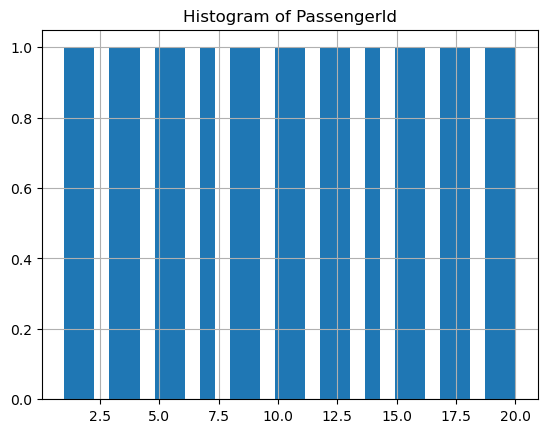

PassengerId Skewness: 0.0


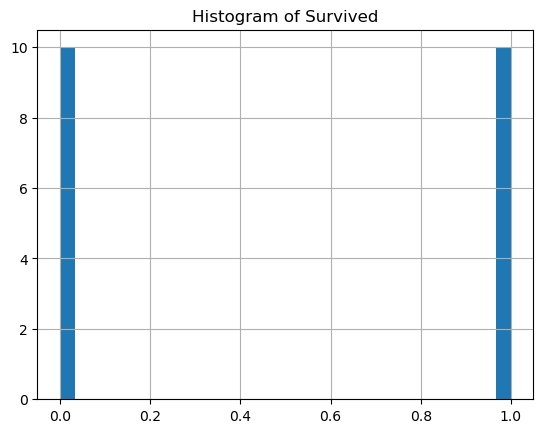

Survived Skewness: 0.0


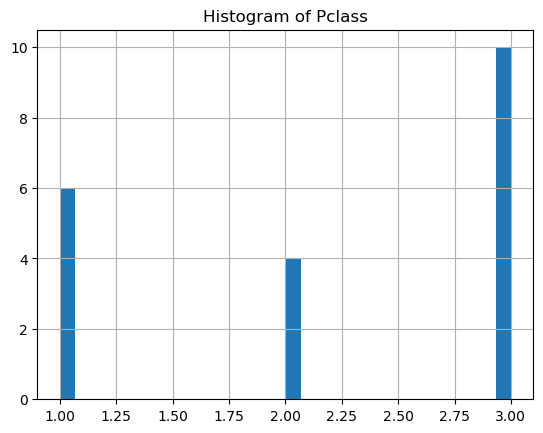

Pclass Skewness: -0.4315218903946969


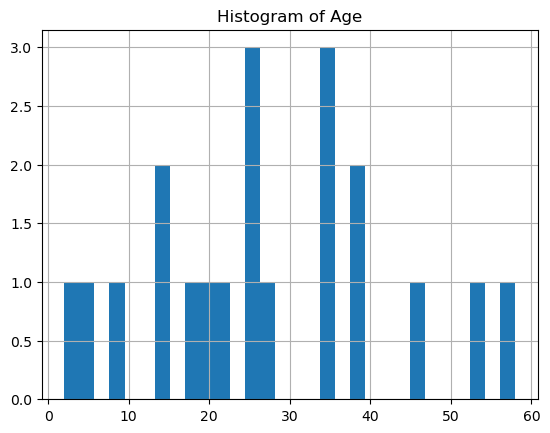

Age Skewness: 0.2723048997897824


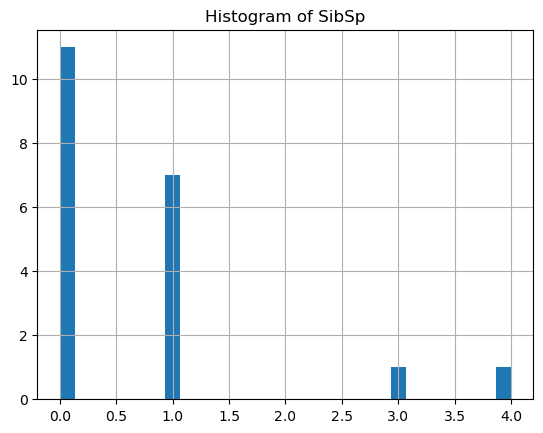

SibSp Skewness: 2.061389146160769


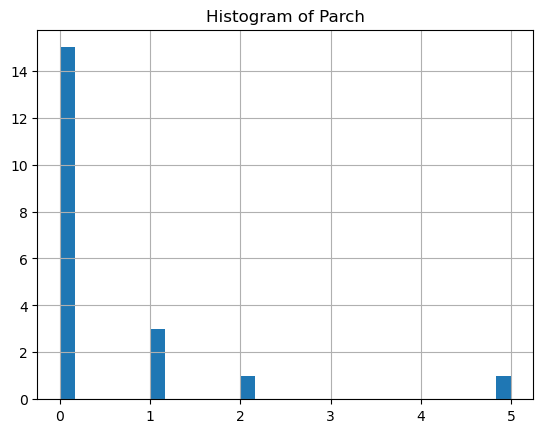

Parch Skewness: 3.2104920095115674


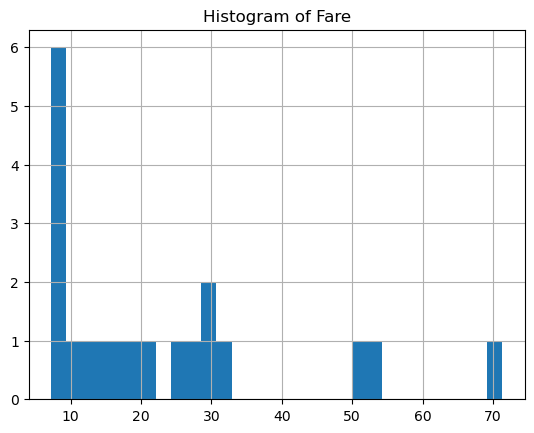

Fare Skewness: 1.4574469572039332


In [9]:
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()
    
    print(f"{col} Skewness: {df[col].skew()}")


In [10]:
for col in num_cols:
    if df[col].skew() > 1:
        df[col] = np.log1p(df[col])


In [11]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [12]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [13]:
scaler_std = StandardScaler()
df[num_cols] = scaler_std.fit_transform(df[num_cols])


In [15]:
num_df = df.select_dtypes(include='number')


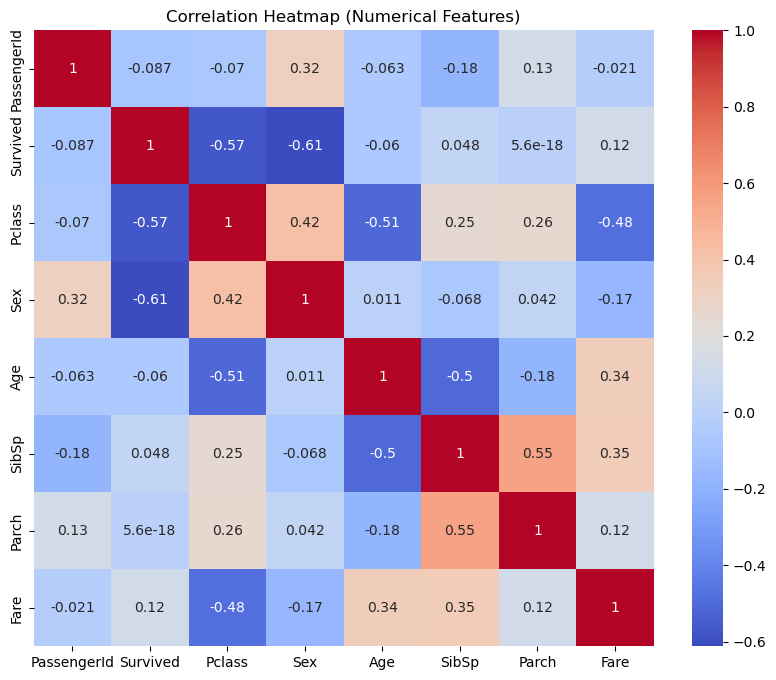

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [18]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [19]:
X_num = X.select_dtypes(include='number')


In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_num, y)


In [21]:
selected_features = X_num.columns[selector.get_support()]
print(selected_features)


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [25]:
X = pd.get_dummies(X, drop_first=True)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.75


In [1]:
df.to_csv(r"C:\Users\User\Desktop\AIML\Aiml_learning/transformed.csv", index=False)

NameError: name 'df' is not defined